<a href="https://colab.research.google.com/github/LeonardoGastaldo/labo2025v/blob/main/src/Clase8/Estadistico_Adecuado_Chi_Cuadrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comenzando...
Limpiando la memoria

In [1]:
# limpio la memoria
rm(list=ls(all.names=TRUE)) # remove all objects
gc(full=TRUE, verbose=FALSE) # garbage collection

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,657218,35.1,1454502,77.7,1325434,70.8
Vcells,1220160,9.4,8388608,64.0,1975136,15.1


Cargar librerías

In [41]:
install.packages("reshape2")
library(reshape2)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Matriz de Modalidad por Cohorte 2025
Se carga la matriz con los datos de las diferentes modalidades elegidas por los alumnos de la Univerdad Austral en las diferentes Sedes.

In [2]:
# Cargar los datos en forma de tabla de contingencia
datos <- matrix(c(
  2, 11, 10,   # Buenos Aires: Gerencial, Junior, Senior
  7, 3, 3,     # Rosario: Gerencial, Junior, Senior
  31, 17, 11   # Virtual: Gerencial, Junior, Senior
),
nrow = 3, byrow = TRUE)

# Asignar nombres a filas y columnas
rownames(datos) <- c("Buenos Aires", "Rosario", "Virtual")
colnames(datos) <- c("Gerencial", "Junior", "Senior")

# Mostrar tabla
print("Tabla de contingencia:")
print(datos)

[1] "Tabla de contingencia:"
             Gerencial Junior Senior
Buenos Aires         2     11     10
Rosario              7      3      3
Virtual             31     17     11


##Boxplot por modalidad por cantidad de alumnos

Este gráfico Boxplot muestra la mediana, rango intercuartílico y posibles outliers para los alumnos de cada Modalidad de diferentes Sedes de la Univerdad Austral.

**La modalidad Gerencial tiene la mayor variabilidad**: algunas sedes casi no la eligen, otras la eligen en masa.

Junior y Senior muestran una distribución más estable y simétrica. Tienen una mediana muy similar, cerca de 10.

Boxplot por modalidad:


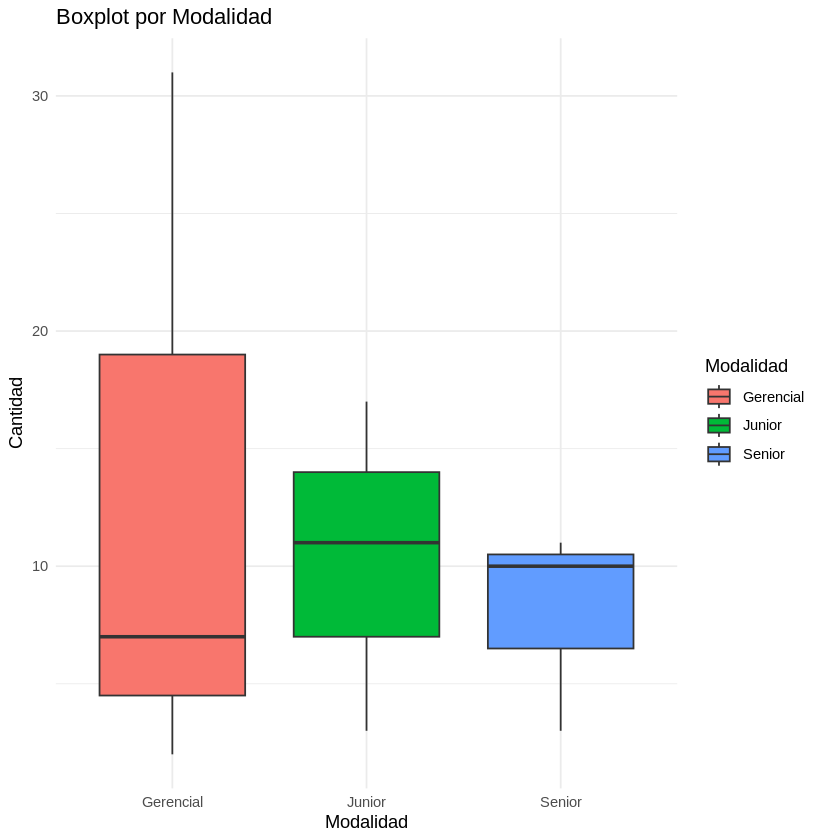

In [20]:
# Gráfico: Boxplot por modalidad
cat("Boxplot por modalidad:\n")
ggplot(long_data, aes(x = Modalidad, y = Cantidad, fill = Modalidad)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Boxplot por Modalidad", y = "Cantidad", x = "Modalidad")

##Distribución por Modalidad y Edición 2025

Las líneas conectan los valores por edición, permitiendo comparar cómo cambia la preferencia de modalidades dentro de cada sede o edición.

La edición **Virtual tiene una preferencia muy marcada por Gerencial** y concentra la mayor cantidad de estudiantes.

Buenos Aires tiene un patrón inverso: prácticamente no hay Gerenciales y predominan Junior y Senior.

Rosario muestra una distribución más pareja pero con poca cantidad de estudiantes en general.

Dotplot con líneas por modalidad:


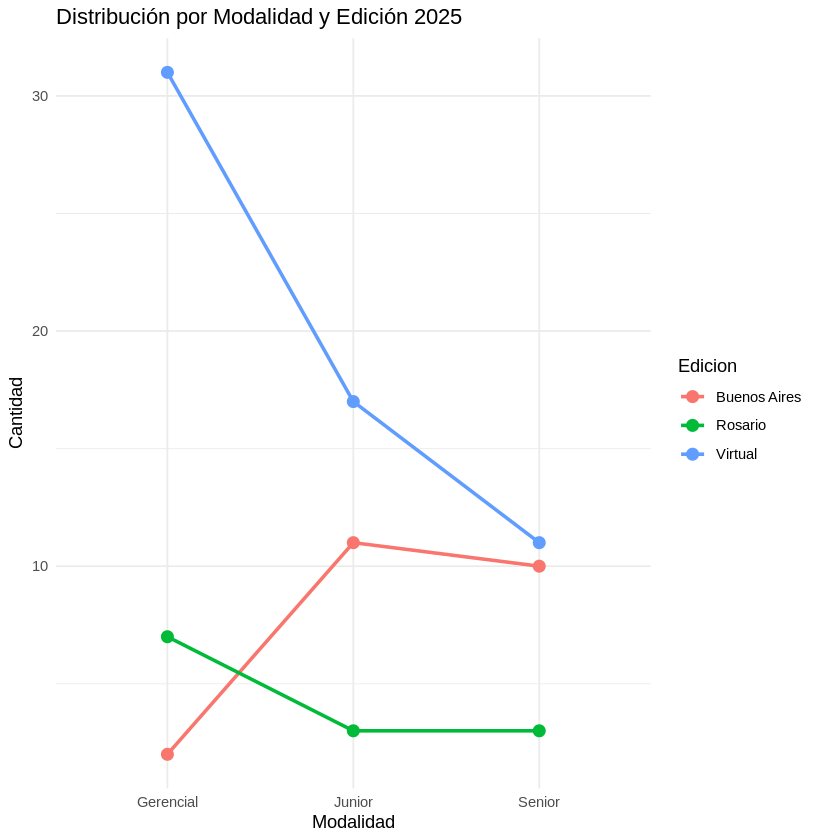

In [33]:
# Gráfico: Dotplot con líneas conectadas
dotplot_data <- as.data.frame(datos)
colnames(dotplot_data) <- c("Gerencial", "Junior", "Senior")
dotplot_data$Edicion <- rownames(dotplot_data)

long_data <- melt(dotplot_data, id.vars = "Edicion", variable.name = "Modalidad", value.name = "Cantidad")

# Dotplot con líneas por Modalidad
cat("Dotplot con líneas por modalidad:\n")
ggplot(long_data, aes(x = Modalidad, y = Cantidad, group = Edicion, color = Edicion)) +
  geom_point(size = 3) +
  geom_line(linewidth = 1) +
  theme_minimal() +
  labs(title = "Distribución por Modalidad y Edición 2025", y = "Cantidad", x = "Modalidad")


## Test Chi-cuadrado de independencia
Porque permite evaluar si la distribución de una variable categórica Modalidad del alumno (Gerencial, Junior o Senior) es independiente de otra variable categórica Edición de la maestría (Buenos Aires, Rosario, Virtual).
De esta manera podriamos saber si la elección de la Modalidad del alumno depende de la Edición de la Maestría, o si simplemente se distribuyen de forma similar entre las tres Ediciones.

Se podría plantear esta hipotesis:

### Hipótesis

*   **H₀:** La distribución de Modalidad del alumno es independiente de la Edición de la maestría (no hay diferencia significativa).
*   **H₁:** La distribución de Modalidad del alumno depende de la Edición de la maestría (hay una diferencia significativa).

In [34]:
# Realizar test de Chi-cuadrado
chi_test <- suppressWarnings(chisq.test(datos))

# Mostrar resultados
print("Resultado del test de Chi-cuadrado:")
print(chi_test)


[1] "Resultado del test de Chi-cuadrado:"

	Pearson's Chi-squared test

data:  datos
X-squared = 14.372, df = 4, p-value = 0.006197



Si p < 0.05, rechazamos la hipótesis nula: hay una relación significativa entre la edición de la maestría y la modalidad del alumno.

Si p >= 0.05, no se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que exista una relación.

### Demostración

Se demuestra para cada edición y modalidad estadísticamente con el Test Chi-Cuadrado si es significativo o no la diferencia encontrada. También se muestra si se Rechaza o no la Hipótesis cero.

In [35]:
# Crear tabla completa de resultados
p_values <- 2 * (1 - pnorm(abs(residuos)))   # normal estándar bilateral

# Vectorizar bien para evitar columnas duplicadas
res_vec <- as.vector(residuos)
p_vec   <- as.vector(p_values)

resultados_completos <- data.frame(
  Edicion    = rep(rownames(datos), times = ncol(datos)),
  Modalidad  = rep(colnames(datos), each  = nrow(datos)),
  Residuo    = round(res_vec, 3),
  p_valor    = signif(p_vec, 4),
  Significancia_5pc = ifelse(p_vec < 0.05, "SI (Rechazar H0)", "NO (No rechazar H0)"),
  stringsAsFactors = FALSE
)

cat("Tabla de resultados por celda:\n")
print(resultados_completos, row.names = FALSE)


Tabla de resultados por celda:
      Edicion Modalidad Residuo   p_valor   Significancia_5pc
 Buenos Aires Gerencial  -3.728 0.0001932    SI (Rechazar H0)
      Rosario Gerencial   0.923 0.3561000 NO (No rechazar H0)
      Virtual Gerencial   2.638 0.0083460    SI (Rechazar H0)
 Buenos Aires    Junior   1.785 0.0742200 NO (No rechazar H0)
      Rosario    Junior  -0.791 0.4290000 NO (No rechazar H0)
      Virtual    Junior  -1.016 0.3096000 NO (No rechazar H0)
 Buenos Aires    Senior   2.309 0.0209300    SI (Rechazar H0)
      Rosario    Senior  -0.195 0.8452000 NO (No rechazar H0)
      Virtual    Senior  -1.901 0.0573400 NO (No rechazar H0)


### **Diferencias estadísticas significativas**
Los datos que se visualizan en la tabla a continuación, son las celdas que apoyan el **rechazo de H₀** (es decir, sugieren que hay relación entre edición y modalidad):

*   Buenos Aires - Gerencial → *p ≈ 0.000*
*   Virtual - Gerencial → *p ≈ 0.008*
*   Buenos Aires - Senior → *p ≈ 0.021*

In [37]:
# Mostrar las diferencias significativos
cat("Celdas con diferencia significativa (p < 0.05):\n")
signif_5 <- subset(resultados_completos, p_valor < 0.05)
print(signif_5, row.names = FALSE)

Celdas con diferencia significativa (p < 0.05):
      Edicion Modalidad Residuo   p_valor Significancia_5pc
 Buenos Aires Gerencial  -3.728 0.0001932  SI (Rechazar H0)
      Virtual Gerencial   2.638 0.0083460  SI (Rechazar H0)
 Buenos Aires    Senior   2.309 0.0209300  SI (Rechazar H0)


### Matriz de significancia para modalidad por Edición 2025

Mostramos una matriz de p-valores de comparaciones por Edición 2025, proveniente del test de Chi-Cuadrado de independia entre las distintas modalidades.
| Valor p      | Interpretación            | Color aproximado       |
| ------------ | ------------------------- | ---------------------- |
| **< 0.05**   | Diferencia significativa  | Blanco/amarillo pálido |
| **0.05–0.1** | Tendencia a significancia | Amarillo claro         |
| **≥ 0.1**    | No significativa          | Naranja/rojo fuerte    |


Matriz de p-valores:


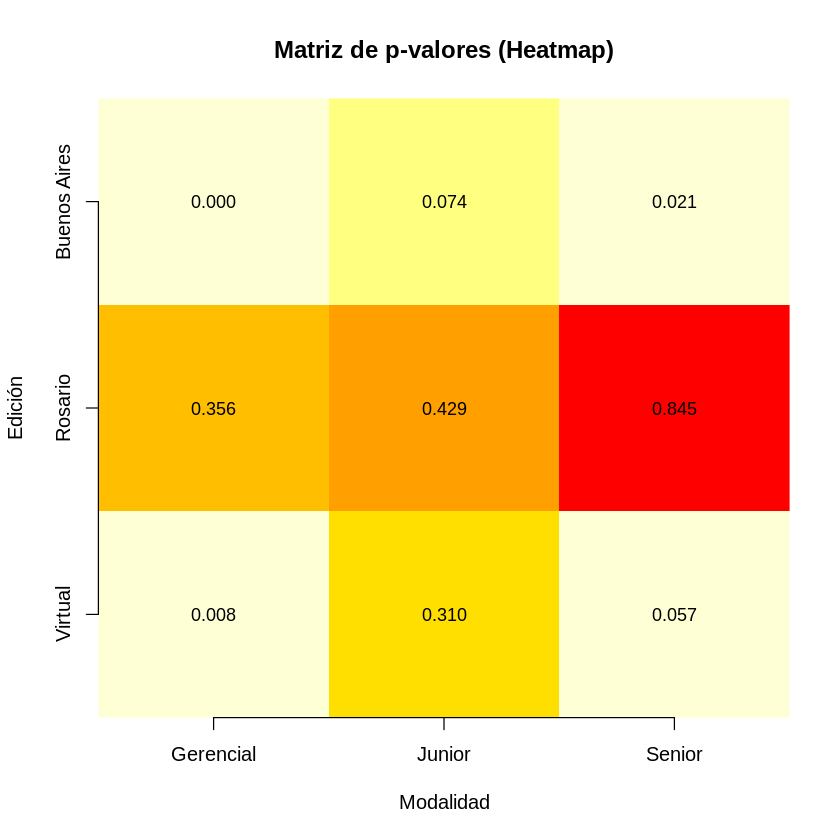

In [47]:
# Gráfico: Matriz de calor (heatmap)
heatmap_matrix <- matrix(p_values, nrow = 3, byrow = FALSE)
rownames(heatmap_matrix) <- rownames(datos)
colnames(heatmap_matrix) <- colnames(datos)

# Usar el gráfico base para matriz coloreada según significancia
cat("Matriz de p-valores:\n")
image(
  1:ncol(heatmap_matrix), 1:nrow(heatmap_matrix), t(heatmap_matrix[nrow(heatmap_matrix):1, ]),
  axes = FALSE, col = heat.colors(12, rev=TRUE), main = "Matriz de p-valores (Heatmap)",
  xlab = "Modalidad", ylab = "Edición"
)
axis(1, at = 1:ncol(heatmap_matrix), labels = colnames(heatmap_matrix))
axis(2, at = 1:nrow(heatmap_matrix), labels = rev(rownames(heatmap_matrix)))

# ---- Agregar valores encima de cada celda ----
for (i in 1:nrow(heatmap_matrix)) {
  for (j in 1:ncol(heatmap_matrix)) {
    # coordenada y invertida para coincidir con el image()
    text(
      x = j,
      y = nrow(heatmap_matrix) - i + 1,
      labels = formatC(heatmap_matrix[i, j], format = "f", digits = 3),
      cex = 0.9
    )
  }
}

---
### **Datos detallados**
Vamos a verificar la freciencia observada para compararla con la frecuencia esperada de acuerdo a la contribución del Chi-Cuadrado.

**Interpretación de cada sección**

*   **Observado vs Esperado:** Compara cuántos alumnos realmente eligieron cada modalidad según edición, y cuántos se esperarían si no hubiera relación entre variables.

*   **% por fila:** Muestra la preferencia dentro de cada sede (por ejemplo: en Buenos Aires, el % de gerenciales vs juniors vs seniors).

*   **% por columna:** Muestra cómo se distribuye cada modalidad entre sedes (por ejemplo: qué % de los gerenciales son de Virtual).

*   **Contribución al Chi-cuadrado:** Permite identificar las celdas responsables del rechazo de la hipótesis nula (por ejemplo: si en Virtual hay muchos más Gerenciales de los que se esperaban, eso se verá reflejado con una alta contribución).

In [60]:
# 1. Frecuencia observada
observado <- datos

# 2. Totales por fila y columna
total_filas <- rowSums(observado)
total_columnas <- colSums(observado)
total_general <- sum(observado)

# 3. Frecuencias esperadas
esperado <- outer(total_filas, total_columnas) / total_general

# 4. Porcentajes
porc_fila <- round(observado / rowSums(observado) * 100, 1)
porc_col  <- round(t(t(observado) / colSums(observado)) * 100, 1)

# 5. Contribución al Chi-cuadrado (observado - esperado)^2 / esperado
contrib <- round((observado - esperado)^2 / esperado, 3)

# 6. Armar tabla completa
informe <- data.frame(
  Edicion     = rep(rownames(observado), times = ncol(observado)),
  Modalidad   = rep(colnames(observado), each  = nrow(observado)),
  Observado   = as.vector(observado),
  Esperado    = round(as.vector(esperado), 2),
  `%Fila`     = as.vector(porc_fila),
  `%Columna`  = as.vector(porc_col),
  Contrib_Chi2 = as.vector(contrib),
  stringsAsFactors = FALSE
)

cat("Tabla resumen completa (valores observados, esperados, % y contribuciones):\n\n")
print(informe, row.names = FALSE)

# Contribución total debe coincidir con el chi² global:
cat("\nChi-cuadrado total (suma de contribuciones):\n")
cat("Total Chi² calculado por celda:", round(sum(contrib), 4), "\n")
cat("Total Chi² según test de R:   ", round(chi_test$statistic, 4), "\n")

# Mostrar las celdas que más contribuyen (e.g. >20% del total)
umbral <- 0.10 * chi_test$statistic
cat("\nCeldas que más contribuyen al Chi² (más del 10%):\n\n")
print(subset(informe, Contrib_Chi2 > umbral), row.names = FALSE)


Tabla resumen completa (valores observados, esperados, % y contribuciones):

      Edicion Modalidad Observado Esperado X.Fila X.Columna Contrib_Chi2
 Buenos Aires Gerencial         2     9.68    8.7       5.0        6.097
      Rosario Gerencial         7     5.47   53.8      17.5        0.426
      Virtual Gerencial        31    24.84   52.5      77.5        1.526
 Buenos Aires    Junior        11     7.51   47.8      35.5        1.627
      Rosario    Junior         3     4.24   23.1       9.7        0.364
      Virtual    Junior        17    19.25   28.8      54.8        0.264
 Buenos Aires    Senior        10     5.81   43.5      41.7        3.021
      Rosario    Senior         3     3.28   23.1      12.5        0.025
      Virtual    Senior        11    14.91   18.6      45.8        1.023

Chi-cuadrado total (suma de contribuciones):
Total Chi² calculado por celda: 14.373 
Total Chi² según test de R:    14.3723 

Celdas que más contribuyen al Chi² (más del 10%):

      Edicion M

#Interpretación:

El test de chi-cuadrado de independencia arrojó un **valor de Chi² = 14.37** con un **valor-p asociado menor a 0.05**, lo cual indica que **existe una diferencia significativa** entre las ediciones de la maestría y la modalidad elegida por los alumnos.

El análisis celda a celda muestra que las combinaciones más relevantes en la contribución a la diferencia son:

*   Gerenciales en Buenos Aires, donde hubo muchos menos de los esperados.
*   Seniors y Junior en Buenos Aires, con más de los esperados.
*   **Gerenciales en Virtual, también con más de los esperados.**

Estas observaciones indican que la modalidad **Gerencial tiene un fuerte sesgo hacia la edición Virtual**, mientras que Buenos Aires es quien tiene más perfiles Senior de lo que se esperaría bajo independencia.

***En consecuencia, se rechaza la hipótesis nula de independencia entre edición y modalidad.***